In [1]:
import numpy as np
from HestonFunctions import Heston_explicit_bf, HestonCallClosedForm
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r*T)* norm.cdf(d2)

C:\Users\IshaG\AppData\Local\Temp\ipykernel_13964\3545630752.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))


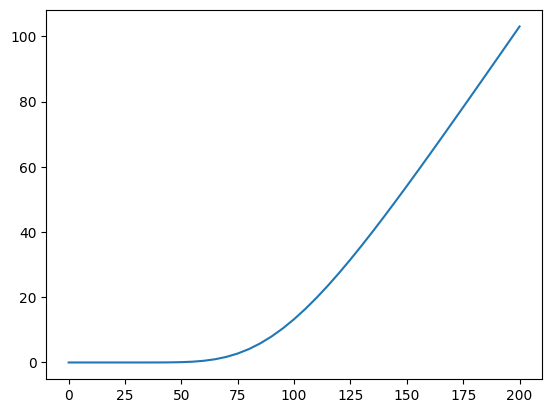

In [3]:
S_range = np.linspace(0, 200, 41)

option_prie_BS = []
for s in S_range:
    option_prie_BS.append(BS_CALL(S=s, K=100, T=1, r= 0.03, sigma=0.3))

plt.plot(S_range, option_prie_BS)

In [4]:
U_explicit_3,_ = Heston_explicit_bf(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/3000, S0=200, I=40, J=20, K=100)
# U_explicit_20,_ = Heston_explicit_bf(kappa=2, eta=0.2, sigma=0.3, rho=0.8, V0=1, r=0.03, T=1, dt=1/3000, S0=200, I=40, J=20, K=100)

100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   100 steps donee   

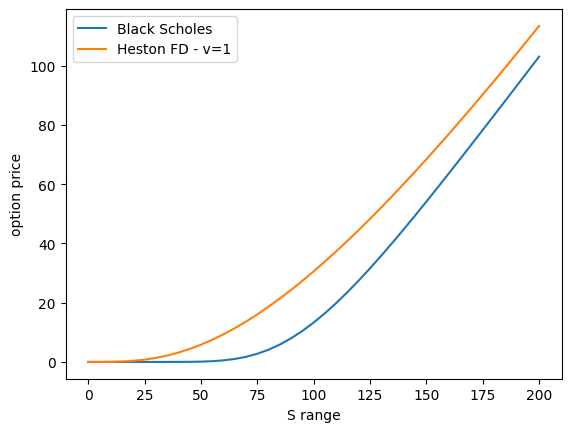

In [5]:
plt.plot(S_range, option_prie_BS, label='Black Scholes')
plt.plot(S_range, U_explicit_3.T[:][-1], label='Heston FD - v=1')
# plt.plot(S_range, U_explicit_20.T[:][-1], label='Heston FD - dt=1/20000')
plt.xlabel('S range')
plt.ylabel('option price')
plt.legend()
plt.savefig("BS-vs-Heston-v1.png", dpi = 300)

The plot suggests that for the same range of underlying asset prices, the Heston model tends to price options higher than Black-Scholes, especially as the price of the underlying asset increases. This could be due to the Heston model's incorporation of the possibility of volatility spikes, which would increase the value of options, as options are more valuable in more volatile markets (since they have a greater chance of ending up in the money).

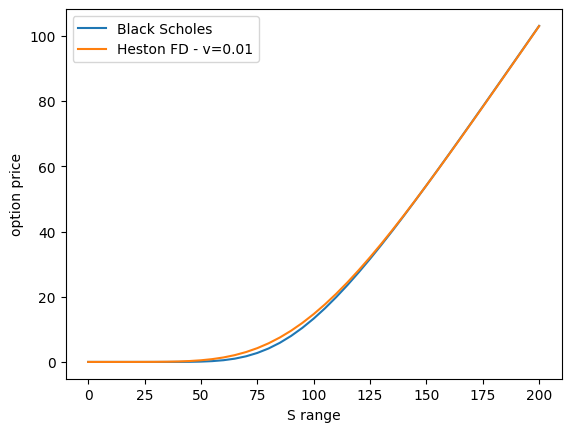

In [34]:
plt.plot(S_range, option_prie_BS, label='Black Scholes')
plt.plot(S_range, U_explicit_3.T[:][0], label='Heston FD - v=0.01')
# plt.plot(S_range, U_explicit_20.T[:][-1], label='Heston FD - dt=1/20000')
plt.xlabel('S range')
plt.ylabel('option price')
plt.legend()
plt.savefig("BS-vs-Heston-v0.png", dpi = 300)

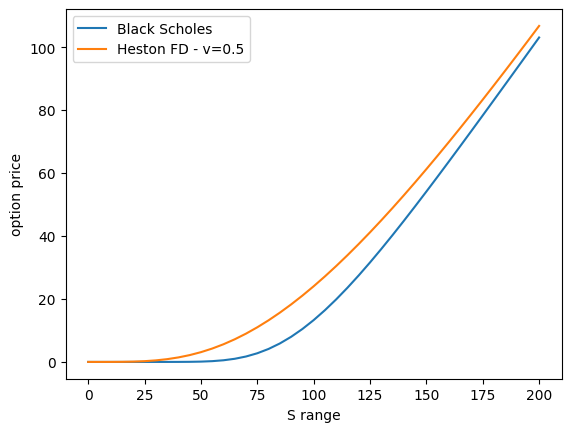

In [36]:
plt.plot(S_range, option_prie_BS, label='Black Scholes')
plt.plot(S_range, U_explicit_3.T[:][10], label='Heston FD - v=0.5')
# plt.plot(S_range, U_explicit_20.T[:][-1], label='Heston FD - dt=1/20000')
plt.xlabel('S range')
plt.ylabel('option price')
plt.legend()

C:\Users\IshaG\AppData\Local\Temp\ipykernel_31732\3545630752.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))


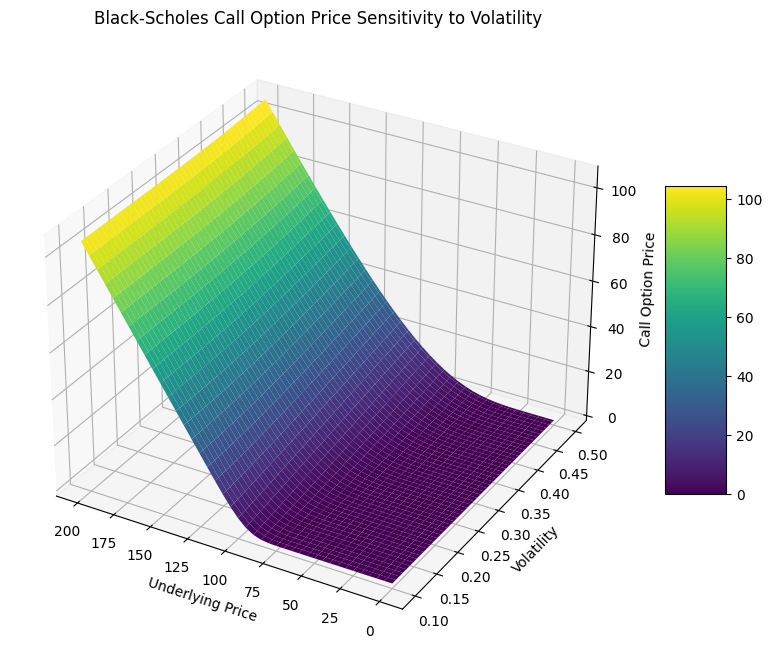

In [28]:
S_range = np.linspace(0, 200, 41)  # Range of stock prices
K = 100  # Strike price
T = 1    # Time to expiration in years
r = 0.05  # Risk-free rate
vol_range = np.linspace(0.1, 0.5, 100)  # Range of volatilities

# Create a meshgrid
S_grid, vol_grid = np.meshgrid(S_range, vol_range)

# Compute option prices
call_prices = BS_CALL(S_grid, K, T, r, vol_grid)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(S_grid, vol_grid, call_prices, cmap='viridis')
ax.set_xlabel('Underlying Price')
ax.set_ylabel('Volatility')
ax.set_zlabel('Call Option Price')
ax.set_title('Black-Scholes Call Option Price Sensitivity to Volatility')
ax.invert_xaxis()
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

21


C:\Users\IshaG\AppData\Local\Temp\ipykernel_31732\3545630752.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))


(21, 41)


Text(0.5, 0, 'Option value')

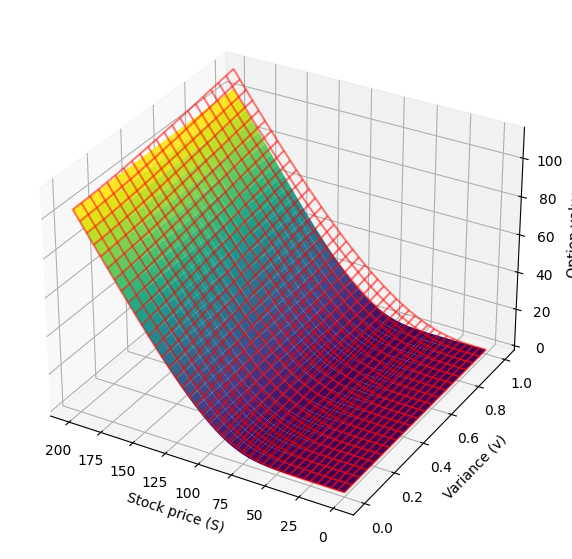

In [27]:
# ttrying to plot the surfaces Black scholes and Heston FD
S_range = np.linspace(0, 200, 41)  # Range of stock prices
v0_range = np.linspace(0, 1, 21)
print(len(v0_range))
option_price_BS = np.zeros((len(v0_range), len(S_range)))

# Create a meshgrid
S_grid, v_grid = np.meshgrid(S_range, v0_range)

for v in range(len(v0_range)):
    for s in range(len(S_range)):
        option_price_BS[v][s] = BS_CALL(S=S_range[s], K=100, T=1, r= 0.03, sigma=0.3)

print(option_price_BS.shape)

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(S_grid, v_grid, option_price_BS, cmap='viridis', edgecolor='none', label='BS')
ax.plot_wireframe(S_grid, v_grid, U_explicit_3.T, color = 'r', alpha = 0.5, label='Heston')
ax.invert_xaxis()
ax.set_xlabel('Stock price (S)')
ax.set_ylabel('Variance (v)')
ax.set_zlabel('Option value')

In the Black-Scholes model, volatility (σ) is a measure of the standard deviation of the underlying asset's returns and is assumed to be constant over the life of the option. This constant volatility is a crucial input into the Black-Scholes formula and reflects the market's expectation of the asset's future volatility.

In the Heston model, variance (v) is not constant; instead, it follows a stochastic process. Specifically, the Heston model describes the variance of the underlying asset with a mean-reverting stochastic differential equation. This means that at any given moment, the variance can differ from its long-term average (θ) but will tend to revert to this mean over time.

The variance in the Heston model can be thought of as a dynamic version of the squared volatility (σ^2) in the Black-Scholes model. The instantaneous volatility in the Heston model is the square root of the variance (v_t).

Here's the relationship between the two:

In Black-Scholes, σ is fixed and known upfront, used for pricing throughout the option's life.
In Heston, v_t(and thus sqrt(v_t), the instantaneous volatility) changes over time according to the stochastic process, which allows for a more realistic modeling of market behavior.
When comparing the two models, if you want to relate the Heston model's variance to the Black-Scholes model's volatility for a particular calculation, you could use the current or initial variance (v_0) from the Heston model as the volatility squared (σ^2) in the Black-Scholes model. Alternatively, you might use the long-term mean variance (θ) or an average variance calculated over the life of the option. This approach can be part of a sensitivity analysis to see how the Black-Scholes model would price options if it allowed volatility to change as the Heston model does.

C:\Users\IshaG\AppData\Local\Temp\ipykernel_31732\3545630752.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))
C:\Users\IshaG\AppData\Local\Temp\ipykernel_31732\3545630752.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S/K) + (r + sigma**2/2)*T) / (sigma*np.sqrt(T))


Text(0.5, 0, 'Option value')

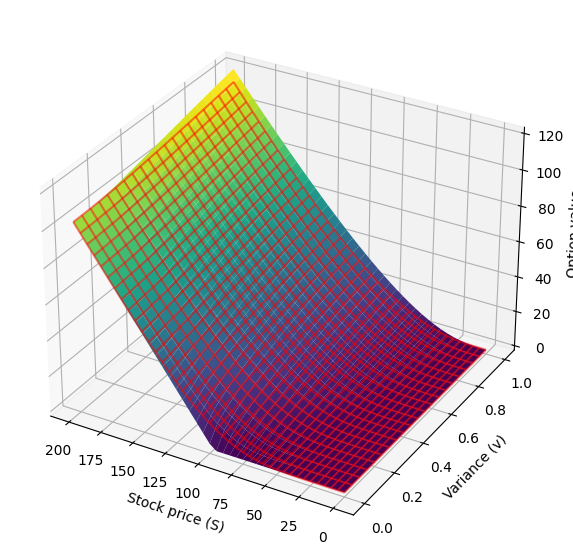

In [43]:
# ttrying to plot the surfaces Black scholes and Heston FD
S_range = np.linspace(0, 200, 41)  # Range of stock prices
v_range = np.linspace(0, 1, 21)
# print(len(v_range))
option_price_BS = np.zeros((len(v0_range), len(S_range)))

# Create a meshgrid
S_grid, v_grid = np.meshgrid(S_range, v0_range)

for v in range(len(v0_range)):
    for s in range(len(S_range)):
        option_price_BS[v][s] = BS_CALL(S=S_range[s], K=100, T=1, r= 0.03, sigma=np.sqrt(v_range[v]))

# print(option_price_BS.shape)

fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.plot_surface(S_grid, v_grid, option_price_BS, cmap='viridis', edgecolor='none', label='BS')
ax.plot_wireframe(S_grid, v_grid, U_explicit_3.T, color = 'r', alpha = 0.5, label='Heston')
ax.invert_xaxis()
ax.set_xlabel('Stock price (S)')
ax.set_ylabel('Variance (v)')
ax.set_zlabel('Option value')
# ax.legend